<a href="https://colab.research.google.com/github/SriYanisaa/chatbot-kampus-merdeka-deep-learning/blob/main/pra_pemrosesan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PraPemrosesan Data

In [1]:
import pandas as pd
import numpy as np
import json
import nltk
from nltk.stem import WordNetLemmatizer
import string
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Embedding, LSTM
from tensorflow.keras.layers import Flatten, Dense, GlobalMaxPool1D
from sklearn.preprocessing import LabelEncoder
import pickle

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# Importing the dataset
with open('kampus_merdeka.json') as content:
  data1 = json.load(content)

# Mendapatkan semua data ke dalam list
tags = [] # data tag
inputs = [] # data input atau pattern
responses = {} # data respon
words = [] # Data kata
classes = [] # Data Kelas atau Tag
documents = [] # Data Kalimat Dokumen
ignore_words = ['?', '!'] # Mengabaikan tanda spesial karakter
# Tambahkan data intents dalam json
for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['patterns']:
    inputs.append(lines)
    tags.append(intent['tag'])
    # digunakan untuk pattern atau teks pertanyaan dalam json
    for pattern in intent['patterns']:
      w = nltk.word_tokenize(pattern)
      words.extend(w)
      documents.append((w, intent['tag']))
      # tambahkan ke dalam list kelas dalam data
      if intent['tag'] not in classes:
        classes.append(intent['tag'])

# Konversi data json ke dalam dataframe
data = pd.DataFrame({"patterns":inputs, "tags":tags})

In [3]:
data

,patterns,tags
0,hallo,greeting
1,hai,greeting
2,halo,greeting
3,hei,greeting
4,hi,greeting
...,...,...
75,Apa itu PMMB?,penjelasan_PMMB
76,Apa saja persyaratan IISMA?,persyaratan_IISMA
77,Bagaimana periode pelaksanaan dan cara mendaft...,periode_dan_pendaftaran_PMMB
78,Apa saja manfaat apabila mengikuti PMMB?,manfaat_PMMB


## Remove Punctuaction

In [4]:
# Removing Punctuations (Menghilangkan Punktuasi)
data['patterns'] = data['patterns'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['patterns'] = data['patterns'].apply(lambda wrd: ''.join(wrd))

In [5]:
data

,patterns,tags
0,hallo,greeting
1,hai,greeting
2,halo,greeting
3,hei,greeting
4,hi,greeting
...,...,...
75,apa itu pmmb,penjelasan_PMMB
76,apa saja persyaratan iisma,persyaratan_IISMA
77,bagaimana periode pelaksanaan dan cara mendaft...,periode_dan_pendaftaran_PMMB
78,apa saja manfaat apabila mengikuti pmmb,manfaat_PMMB


In [6]:
data.to_csv("D:/clean_data_chatbot.csv")

## Lemmatization

In [7]:
lemmatizer = WordNetLemmatizer()
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

print (len(words), "kata-kata yang di lematisasi : ", words)

74 kata-kata yang di lematisasi :  ['afternoon', 'apa', 'apabila', 'bagaimana', 'bai', 'banyak', 'bersertifikat', 'bro', 'bumn', 'bye', 'byebye', 'byee', 'cara', 'dadah', 'dah', 'dalam', 'dan', 'good', 'hai', 'haii', 'hallo', 'halo', 'hei', 'hi', 'hy', 'iisma', 'independen', 'itu', 'jumpa', 'kampus', 'kasih', 'kawan', 'kemendikbud', 'kemensos', 'maaci', 'magang', 'mahasiswa', 'makasi', 'makasih', 'malam', 'manfaat', 'mendaftar', 'mengajar', 'mengikuti', 'merdeka', 'mitra', 'morning', 'muda', 'pagi', 'pejuang', 'pelaksanaan', 'periode', 'persyaratan', 'pertukaran', 'pmmb', 'program', 'saja', 'sampai', 'see', 'selamat', 'si', 'siang', 'sore', 'studi', 'tergabung', 'terima', 'thank', 'thanks', 'thx', 'tinggal', 'tujuan', 'universitas', 'yang', 'you']


### Menyortir Data Kelas Tags

In [8]:
# sorting pada data class
classes = sorted(list(set(classes)))
print (len(classes), "classes", classes)

38 classes ['goodbye', 'greeting', 'manfaat_IISMA', 'manfaat_PMMB', 'manfaat_kampus_mengajar', 'manfaat_magang', 'manfaat_pejuang_muda', 'manfaat_pertukaran_mahasiswa', 'manfaat_studi_independen', 'mitra_IISMA', 'mitra_PMMB', 'mitra_magang', 'mitra_studi_independen', 'penjelasan_IISMA', 'penjelasan_PMMB', 'penjelasan_kampus_mengajar', 'penjelasan_kampus_merdeka', 'penjelasan_magang', 'penjelasan_pejuang_muda', 'penjelasan_pertukaran_mahasiswa', 'penjelasan_studi_independen', 'periode_dan_pendaftaran_IISMA', 'periode_dan_pendaftaran_PMMB', 'periode_dan_pendaftaran_kampus_mengajar', 'periode_dan_pendaftaran_magang', 'periode_dan_pendaftaran_pejuang_muda', 'periode_dan_pendaftaran_pertukaran_mahasiswa', 'periode_dan_pendaftaran_studi_independen', 'persyaratan_IISMA', 'persyaratan_kampus_mengajar', 'persyaratan_kampus_merdeka', 'persyaratan_magang', 'persyaratan_pejuang_muda', 'persyaratan_pertukaran_mahasiswa', 'persyaratan_studi_independen', 'program_kampus_merdeka', 'terimakasih', 'tuju

### Mencari Jumlah Keseluruhan Data Teks

In [10]:
# documents = kombinasi antara data pattern dengan data tag dalam intents json
print (len(documents), "documents")

514 documents


## Tokenisasi

In [11]:
# Tokenize the data (Tokenisasi Data)
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['patterns'])
train = tokenizer.texts_to_sequences(data['patterns'])
train

[[37],
 [38],
 [39],
 [40],
 [41],
 [42],
 [43],
 [44],
 [45],
 [46],
 [47],
 [48],
 [49],
 [50],
 [51],
 [52],
 [53],
 [54],
 [31],
 [55],
 [56, 31],
 [57, 58],
 [59, 60],
 [61],
 [62],
 [63, 32],
 [64],
 [65],
 [66],
 [67],
 [68, 32],
 [33, 34],
 [69],
 [33, 34, 70],
 [1, 6, 4, 5],
 [1, 71, 4, 5],
 [1, 7, 8, 4, 5],
 [1, 2, 3, 4, 5],
 [3, 4, 5, 72],
 [3, 4, 5, 73],
 [3, 4, 5, 74],
 [18, 19],
 [20],
 [4, 21],
 [9],
 [22, 23, 5],
 [24, 25],
 [26],
 [1, 6, 18, 19],
 [1, 2, 7, 18, 19],
 [10, 11, 12, 13, 14, 15, 3, 18, 19],
 [1, 2, 16, 17, 8, 18, 19],
 [1, 2, 35, 28, 29, 30, 18, 19],
 [1, 6, 20, 27],
 [1, 2, 7, 20, 27],
 [10, 11, 12, 13, 14, 15, 3, 20, 27],
 [1, 2, 16, 17, 8, 20, 27],
 [1, 2, 35, 28, 29, 30, 20, 27],
 [1, 6, 4, 21],
 [1, 2, 7, 4, 21],
 [10, 11, 12, 13, 14, 15, 3, 4, 21],
 [1, 2, 16, 17, 8, 4, 21],
 [1, 6, 9],
 [1, 2, 7, 9],
 [10, 11, 12, 13, 14, 15, 3, 9],
 [1, 2, 16, 17, 8, 9],
 [1, 2, 36, 28, 29, 30, 3, 9],
 [1, 6, 22, 23, 5],
 [1, 2, 7, 22, 23, 5],
 [10, 11, 12, 13, 14,

## Padding

In [12]:
# Melakukan proses padding pada data
x_train = pad_sequences(train)
# Menampilkan hasil padding
print(x_train)

[[ 0  0  0  0  0  0  0  0  0 37]
 [ 0  0  0  0  0  0  0  0  0 38]
 [ 0  0  0  0  0  0  0  0  0 39]
 [ 0  0  0  0  0  0  0  0  0 40]
 [ 0  0  0  0  0  0  0  0  0 41]
 [ 0  0  0  0  0  0  0  0  0 42]
 [ 0  0  0  0  0  0  0  0  0 43]
 [ 0  0  0  0  0  0  0  0  0 44]
 [ 0  0  0  0  0  0  0  0  0 45]
 [ 0  0  0  0  0  0  0  0  0 46]
 [ 0  0  0  0  0  0  0  0  0 47]
 [ 0  0  0  0  0  0  0  0  0 48]
 [ 0  0  0  0  0  0  0  0  0 49]
 [ 0  0  0  0  0  0  0  0  0 50]
 [ 0  0  0  0  0  0  0  0  0 51]
 [ 0  0  0  0  0  0  0  0  0 52]
 [ 0  0  0  0  0  0  0  0  0 53]
 [ 0  0  0  0  0  0  0  0  0 54]
 [ 0  0  0  0  0  0  0  0  0 31]
 [ 0  0  0  0  0  0  0  0  0 55]
 [ 0  0  0  0  0  0  0  0 56 31]
 [ 0  0  0  0  0  0  0  0 57 58]
 [ 0  0  0  0  0  0  0  0 59 60]
 [ 0  0  0  0  0  0  0  0  0 61]
 [ 0  0  0  0  0  0  0  0  0 62]
 [ 0  0  0  0  0  0  0  0 63 32]
 [ 0  0  0  0  0  0  0  0  0 64]
 [ 0  0  0  0  0  0  0  0  0 65]
 [ 0  0  0  0  0  0  0  0  0 66]
 [ 0  0  0  0  0  0  0  0  0 67]
 [ 0  0  0

## Encoding Text

In [13]:
# Melakukan konversi data label tags dengan encoding
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])
print(y_train)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0
  0  0 36 36 36 36 36 36 36 36 16 37 30 35 35 35 35 35 35 35 35 35 35 35
 20 34 27  8 12 17 31 24  5 11 15 29 23  4 13 28 21  2  9 19 33 26  7 18
 32 25  6 14 28 22  3 10]


## Input Length, Output Length and Vocabulary

In [14]:
# Melihat hasil input pada data teks
input_shape = x_train.shape[1]
print(input_shape)

10


In [15]:
# Melakukan definisi tiap kalimat dan kata pada data teks
vocabulary = len(tokenizer.word_index)
print("jumlah kata unik : ", vocabulary)

# Melakukan pemeriksaan pada data output label teks
output_length = le.classes_.shape[0]
print("panjang output: ", output_length)

jumlah kata unik :  74
panjang output:  38


Input length dan output length terlihat sangat jelas hasilnya. Mereka adalah untuk bentuk input dan bentuk output dari data train atau latih yang akan diproses pada algoritma LSTM yang akan dilatih.

Vocabulary Size adalah untuk lapisan penyematan untuk membuat representasi vektor unik untuk setiap kata.

## Save Model Words & Classes

In [16]:
# Simpan hasil pemrosesan teks dengan menggunakan pickle
pickle.dump(words, open('words.pkl','wb'))
pickle.dump(classes, open('classes.pkl','wb'))

## Save Label Encoder & Tokenizer

In [17]:
pickle.dump(le, open('le.pkl','wb'))
pickle.dump(tokenizer, open('tokenizers.pkl','wb'))

# MODEL

In [18]:
# Creating the model (Membuat Modelling)
i = Input(shape=(input_shape,)) # Layer Input
x = Embedding(vocabulary+1,10)(i) # Layer Embedding
x = LSTM(10, return_sequences=True, recurrent_dropout=0.2)(x) # Layer Long Short Term Memory
x = Flatten()(x) # Layer Flatten
x = Dense(output_length, activation="softmax")(x) # Layer Dense
model  = Model(i,x) # Model yang telah disusun dari layer Input sampai layer Output

# Compiling the model (Kompilasi Model)
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [19]:
# Visualization Plot Architecture Model (Visualisasi Plot Arsitektur Model)
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [20]:
# Menampilkan parameter pada model LSTM
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 embedding (Embedding)       (None, 10, 10)            750       
                                                                 
 lstm (LSTM)                 (None, 10, 10)            840       
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 38)                3838      
                                                                 
Total params: 5428 (21.20 KB)
Trainable params: 5428 (21.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# Training the model (Melatih model data sampai 350 kali)
train = model.fit(x_train, y_train, epochs=350)

Epoch 1/350
3/3 [==============================] - 5s 15ms/step - loss: 3.6324 - accuracy: 0.0125
Epoch 2/350
3/3 [==============================] - 0s 10ms/step - loss: 3.6209 - accuracy: 0.0875
Epoch 3/350
3/3 [==============================] - 0s 10ms/step - loss: 3.6078 - accuracy: 0.1000
Epoch 4/350
3/3 [==============================] - 0s 14ms/step - loss: 3.5947 - accuracy: 0.1000
Epoch 5/350
3/3 [==============================] - 0s 24ms/step - loss: 3.5805 - accuracy: 0.1000
Epoch 6/350
3/3 [==============================] - 0s 13ms/step - loss: 3.5610 - accuracy: 0.1000
Epoch 7/350
3/3 [==============================] - 0s 13ms/step - loss: 3.5409 - accuracy: 0.1000
Epoch 8/350
3/3 [==============================] - 0s 17ms/step - loss: 3.5152 - accuracy: 0.1000
Epoch 9/350
3/3 [==============================] - 0s 13ms/step - loss: 3.4840 - accuracy: 0.1000
Epoch 10/350
3/3 [==============================] - 0s 14ms/step - loss: 3.4472 - accuracy: 0.1250
Epoch 11/350
3/3 [=

In [22]:
import os

directory = 'D:/'
os.makedirs(directory, exist_ok=True)

model.save('D:/model_chatbot_kampus_merdeka.h5')

c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


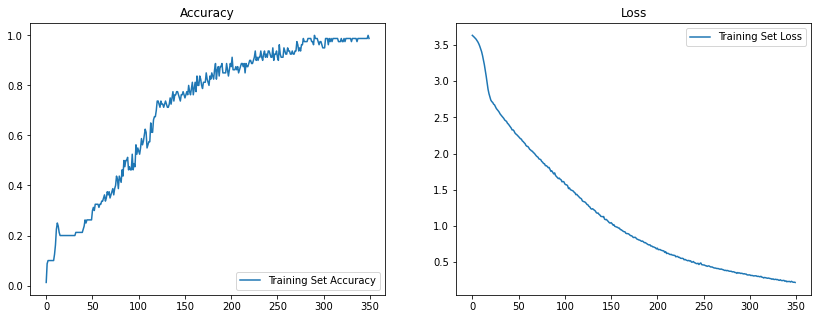

In [23]:
# Plotting model Accuracy and Loss (Visualisasi Plot Hasil Akurasi dan Loss)
# Plot Akurasi
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(train.history['accuracy'], label='Training Set Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(train.history['loss'], label='Training Set Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

## Testing Chatbot

In [24]:
from gtts import gTTS
import random
import time
import os
import IPython.display as ipd

In [25]:
import os
from pydub import AudioSegment

# Membuat Input Chat
while True:
    texts_p = []
    prediction_input = input('👨‍🦰 Kamu : ')

    # Menghapus punktuasi atau tanda baca dan konversi ke huruf kecil
    prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input = ''.join(prediction_input)
    texts_p.append(prediction_input)

    # Melakukan Tokenisasi dan Padding pada data teks
    prediction_input = tokenizer.texts_to_sequences(texts_p)
    # Konversi data teks menjadi array
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input], input_shape)

    # Mendapatkan hasil prediksi keluaran pada model
    output = model.predict(prediction_input)
    output = output.argmax()
    print(output)

    # Menemukan respon sesuai data tag dan memainkan suara bot
    response_tag = le.inverse_transform([output])[0]
    
    # print response tag
    print("🤖 Bot : ", response_tag)
    
    # Bot akan melakukan random jawaban percakapan dari hasil pertanyaan
    print("🤖 Bot : ", random.choice(responses[response_tag]))
    
    # Tambahkan respon 'goodbye' agar bot bisa berhenti melakukan percakapan
    if response_tag == "goodbye":
        break

c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


1/1 [==============================] - 0s 484ms/step
1
🤖 Bot :  greeting
🤖 Bot :  Hai! Mau tau informasi tentang apa nih?
1/1 [==============================] - 0s 44ms/step
35
🤖 Bot :  program_kampus_merdeka
🤖 Bot :  Mau tau tentang apa nih?
1/1 [==============================] - 0s 30ms/step
1
🤖 Bot :  greeting
🤖 Bot :  Halo! Mau tau tentang kampus merdeka, kan?


KeyboardInterrupt: Interrupted by user